In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import gradient_descent_v2 
from tensorflow.keras.utils import to_categorical

warnings.filterwarnings("ignore")
pd.set_option('display.max_rows', 500)

In [6]:
data = pd.read_csv('findata_challenge_train.csv')

In [7]:
data.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x116,x117,x118,x119,x120,x121,x122,x123,x124,y
0,0.067563,-2.172492,-1.713774,-0.146854,-0.685219,-0.933838,4.0,2.0,-4.476051,-1.472306,...,4.607926,52.0,1.0,0.773809,0.766531,6.307142,9.074515,-2.694049,0.330964,0
1,0.099622,0.584803,-6.089758,-0.252186,-0.334912,-4.671281,4.0,2.0,-0.387076,-0.664552,...,15.889763,53.0,1.0,7.065852,0.994304,-0.028411,-21.472850,5.626095,1.293455,0
2,0.648421,3.881137,0.961359,0.217361,-1.471850,-0.975352,5.0,1.0,-0.850146,-4.011487,...,13.770410,53.0,1.0,-8.598553,-2.958302,-12.784030,-36.855873,0.356093,1.499790,0
3,0.005775,-2.726153,2.891378,-0.038325,2.280847,1.761478,3.0,3.0,9.116188,-4.610151,...,5.904901,50.0,1.0,8.194975,-7.798308,10.910515,15.226094,-10.440813,-0.735116,0
4,0.044396,2.803576,-1.923381,-0.116657,-1.574199,6.098627,3.0,1.0,-13.956141,13.785099,...,-14.603703,47.0,0.0,2.330789,-8.249825,-12.680490,40.192302,-5.037065,1.679262,1


In [9]:
data.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 126 columns):
 #    Column  Non-Null Count   Dtype  
---   ------  --------------   -----  
 0    x0      99877 non-null   float64
 1    x1      99869 non-null   float64
 2    x2      99876 non-null   float64
 3    x3      99885 non-null   float64
 4    x4      99863 non-null   float64
 5    x5      99884 non-null   float64
 6    x6      99878 non-null   float64
 7    x7      99867 non-null   float64
 8    x8      99866 non-null   float64
 9    x9      99870 non-null   float64
 10   x10     99858 non-null   float64
 11   x11     99872 non-null   float64
 12   x12     99865 non-null   float64
 13   x13     99855 non-null   float64
 14   x14     99844 non-null   float64
 15   x15     99877 non-null   float64
 16   x16     99862 non-null   float64
 17   x17     99871 non-null   float64
 18   x18     99864 non-null   float64
 19   x19     99877 non-null   float64
 20   x20     99869 non-null   

C:\Users\wwask\AppData\Local\Temp/ipykernel_29136/2802456010.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  data.info(verbose=True, null_counts=True)


In [10]:
for column in data:
  print('Persentase data null pada kolom', 
        column,':', round(100*data.isnull().sum()[column]/data.shape[0],2), '%')

Persentase data null pada kolom x0 : 0.12 %
Persentase data null pada kolom x1 : 0.13 %
Persentase data null pada kolom x2 : 0.12 %
Persentase data null pada kolom x3 : 0.12 %
Persentase data null pada kolom x4 : 0.14 %
Persentase data null pada kolom x5 : 0.12 %
Persentase data null pada kolom x6 : 0.12 %
Persentase data null pada kolom x7 : 0.13 %
Persentase data null pada kolom x8 : 0.13 %
Persentase data null pada kolom x9 : 0.13 %
Persentase data null pada kolom x10 : 0.14 %
Persentase data null pada kolom x11 : 0.13 %
Persentase data null pada kolom x12 : 0.14 %
Persentase data null pada kolom x13 : 0.14 %
Persentase data null pada kolom x14 : 0.16 %
Persentase data null pada kolom x15 : 0.12 %
Persentase data null pada kolom x16 : 0.14 %
Persentase data null pada kolom x17 : 0.13 %
Persentase data null pada kolom x18 : 0.14 %
Persentase data null pada kolom x19 : 0.12 %
Persentase data null pada kolom x20 : 0.13 %
Persentase data null pada kolom x21 : 0.13 %
Persentase data null

In [11]:
data.dropna(axis=0, inplace= True)

In [12]:
for column in data:
  print('Persentase data null pada kolom', 
        column,':', round(100*data.isnull().sum()[column]/data.shape[0],2), '%')

Persentase data null pada kolom x0 : 0.0 %
Persentase data null pada kolom x1 : 0.0 %
Persentase data null pada kolom x2 : 0.0 %
Persentase data null pada kolom x3 : 0.0 %
Persentase data null pada kolom x4 : 0.0 %
Persentase data null pada kolom x5 : 0.0 %
Persentase data null pada kolom x6 : 0.0 %
Persentase data null pada kolom x7 : 0.0 %
Persentase data null pada kolom x8 : 0.0 %
Persentase data null pada kolom x9 : 0.0 %
Persentase data null pada kolom x10 : 0.0 %
Persentase data null pada kolom x11 : 0.0 %
Persentase data null pada kolom x12 : 0.0 %
Persentase data null pada kolom x13 : 0.0 %
Persentase data null pada kolom x14 : 0.0 %
Persentase data null pada kolom x15 : 0.0 %
Persentase data null pada kolom x16 : 0.0 %
Persentase data null pada kolom x17 : 0.0 %
Persentase data null pada kolom x18 : 0.0 %
Persentase data null pada kolom x19 : 0.0 %
Persentase data null pada kolom x20 : 0.0 %
Persentase data null pada kolom x21 : 0.0 %
Persentase data null pada kolom x22 : 0.0 

In [18]:
x = ['x21','x79','x89','x108','x112']
for i in x:
    data[i]
    print(data[i])

0        Jun
2        Jul
3        Jun
4        Jul
5        Jul
        ... 
99994    May
99995    Jun
99996    Jul
99997    Mar
99999    Jul
Name: x21, Length: 83976, dtype: object
0        Laki-laki
2        Perempuan
3        Laki-laki
4        Laki-laki
5        Perempuan
           ...    
99994    Perempuan
99995    Perempuan
99996    Laki-laki
99997    Laki-laki
99999    Perempuan
Name: x79, Length: 83976, dtype: object
0                     Jambi
2          Sumatera Selatan
3          Kalimantan Utara
4          Kalimantan Utara
5                     Jambi
                ...        
99994             Gorontalo
99995             Gorontalo
99996    Kalimantan Selatan
99997      Kalimantan Timur
99999      Kalimantan Timur
Name: x89, Length: 83976, dtype: object
0            SMP
2             SD
3            SMP
4        SMA/SMK
5            SMP
          ...   
99994        SMP
99995        SMP
99996        SMP
99997        SMP
99999         SD
Name: x108, Length: 83976, dtype:

In [13]:
yes = data[data['y']==1]
no = data[data['y']==0]

In [14]:
num = data.drop(['x21','x79','x89','x108','x112'],axis = 1)

In [15]:
yesnum = num[num['y']==1]
nonum = num[num['y']==0]

# EDA

In [16]:
data.describe()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x116,x117,x118,x119,x120,x121,x122,x123,x124,y
count,83976.000000,83976.000000,83976.000000,83976.000000,83976.000000,83976.000000,83976.000000,83976.000000,83976.000000,83976.000000,...,83976.000000,83976.000000,83976.000000,83976.000000,83976.000000,83976.000000,83976.000000,83976.000000,83976.000000,83976.000000
mean,0.000264,-0.005031,0.010994,-0.000575,-0.678463,-0.001178,4.305623,2.366926,0.013259,-0.020372,...,0.054679,50.011491,0.577224,3.881566,-0.027493,0.009969,7.567098,-0.008691,0.007711,0.170096
std,0.424121,3.381543,3.089351,0.121784,2.563236,4.036715,1.139923,0.728503,7.780382,5.386557,...,9.063216,6.904524,0.494003,10.809455,5.577672,9.742318,35.435335,3.954638,4.132024,0.375720
min,-1.724571,-16.097070,-13.519334,-0.517647,-13.627396,-16.984482,0.000000,0.000000,-34.513401,-21.393586,...,-37.320446,22.000000,0.000000,-42.113882,-23.512064,-42.803538,-165.068134,-17.229400,-16.394975,0.000000
25%,-0.288304,-2.276226,-2.067732,-0.083296,-2.382852,-2.719744,4.000000,2.000000,-5.233990,-3.654129,...,-6.054138,45.000000,0.000000,-3.248315,-3.798855,-6.616723,-16.321994,-2.659702,-2.769695,0.000000
50%,-0.000356,0.015598,0.020028,-0.000726,-0.681904,0.006003,4.000000,2.000000,0.004360,-0.043480,...,0.047744,50.000000,1.000000,3.896929,-0.024732,-0.013921,6.634308,-0.027301,-0.007353,0.000000
75%,0.286692,2.282230,2.092815,0.081421,1.034253,2.717009,5.000000,3.000000,5.283257,3.603014,...,6.165543,55.000000,1.000000,11.036053,3.744791,6.652673,30.859562,2.646607,2.788758,0.000000
max,1.714387,14.768077,13.335437,0.513763,10.442234,20.186745,9.000000,5.000000,31.449940,23.296840,...,38.141106,80.000000,1.000000,57.003256,25.927916,41.261627,174.645087,17.058603,17.921770,1.000000


In [19]:
yes[x].describe()

,x21,x79,x89,x108,x112
count,14284,14284,14284,14284,14284
unique,11,2,25,5,11
top,Jun,Laki-laki,Kalimantan Barat,SMP,Jul
freq,3978,7212,1779,8602,3871


In [20]:
no[x].describe()

,x21,x79,x89,x108,x112
count,69692,69692,69692,69692,69692
unique,12,2,27,5,12
top,Jun,Perempuan,Kalimantan Tengah,SMP,Jul
freq,19744,34934,8687,42032,19108


* Yes adalah data pelanggan yang churn, sedangkan no adalah data pelanggan yang tidak churn
* Pada data pelanggan yang churn yang paling sering muncul adalah pelanggan laki- laki yang berdomisili di Kalimantan Barat yang berpendidikan SMP
* Pada data pelanggan yang tidak churn yang paling sering muncul adalah pelanggan perempuan yang berdomisili di Kalimantan Tengah yang berpendidikan SMP

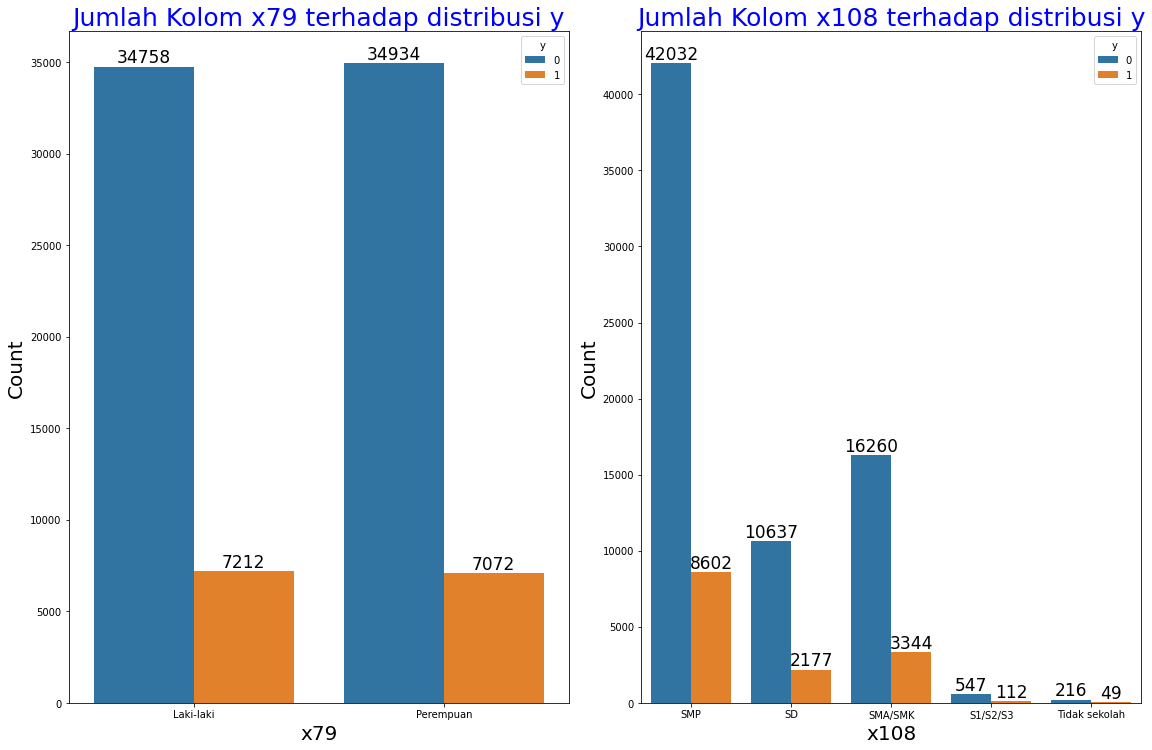

In [25]:
y = ['x79','x108']
plt.figure(figsize=(24,20))
for i in range(0, len(y)):
    plt.subplot(2, 3, i+1)
    a = sns.countplot(data[y[i]], hue=data['y'], 
                  orient='v')
    a.set_title('Jumlah Kolom '+ y[i]+' terhadap distribusi y',fontsize= 25, color = 'blue')
    a.set_xlabel(y[i],fontsize= 20)
    a.set_ylabel('Count', fontsize= 20)
    for container in a.containers:
      a.bar_label(container, fontsize=17)
        
plt.tight_layout()

* Jenis kelamin laki- laki dan perempuan memiliki distribusi yang sama terhadap churn
* Jumlah Churn terbanyak pada kolom pendidikan dimiliki oleh SMP lalu SMA/SMK

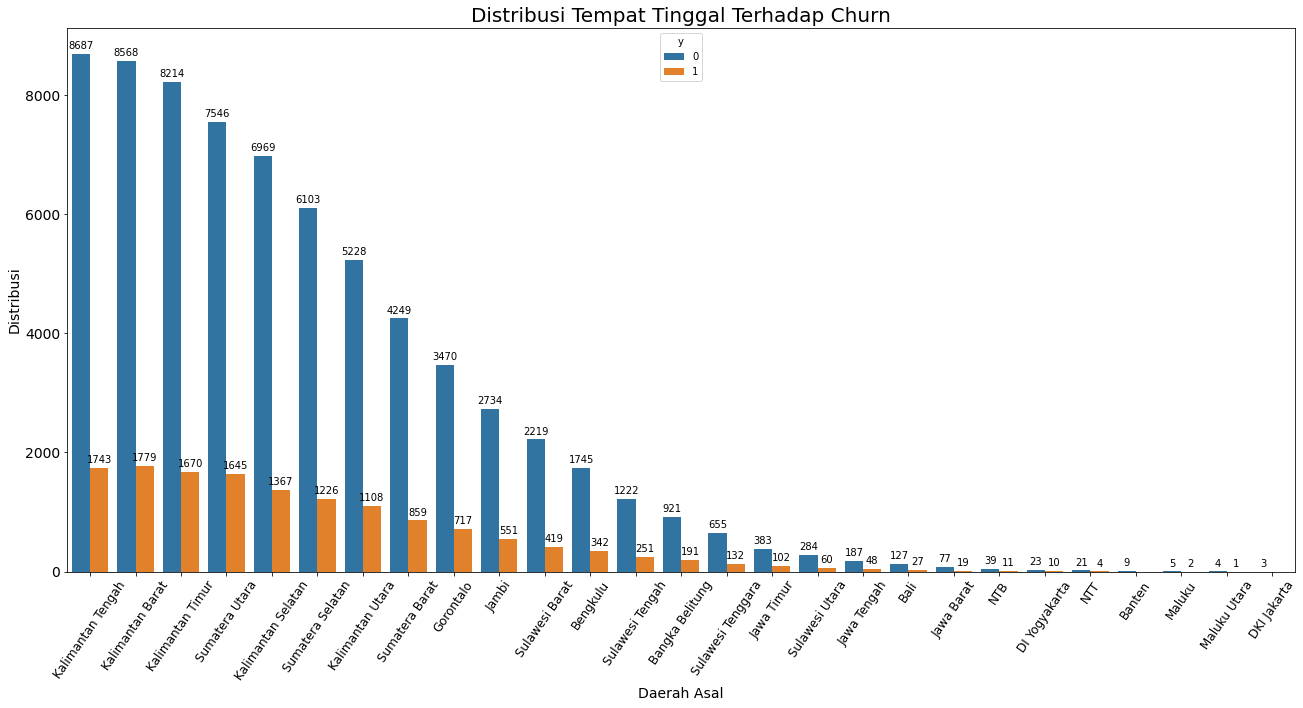

In [26]:
plt.figure(figsize=(22,10))
p1 = sns.countplot(data['x89'], hue=data['y'], orient='v', order = data['x89'].value_counts().index)
plt.title("Distribusi Tempat Tinggal Terhadap Churn",fontsize=20)
p1.set_xlabel("Daerah Asal",fontsize=14)
plt.xticks(fontsize=12, rotation = 55)
p1.set_ylabel("Distribusi",fontsize=14)
plt.yticks(fontsize=14)
for container in p1.containers:
    p1.bar_label(container, label_type='edge', padding = 3)

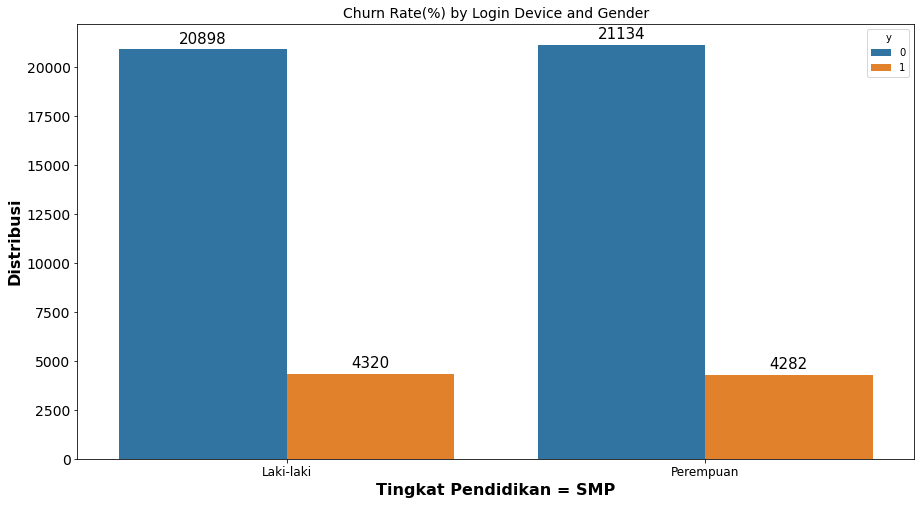

In [27]:
plt.figure(figsize=(15,8))
p1 = sns.countplot(x= 'x79', hue='y', data = data.loc[data['x108']=='SMP'])
plt.title("Churn Rate(%) by Login Device and Gender",fontsize=14)
p1.set_xlabel("Tingkat Pendidikan = SMP",fontsize=16, fontweight='bold')
plt.xticks(fontsize=12)
p1.set_ylabel("Distribusi",fontsize=16, fontweight='bold')
plt.yticks(fontsize=14)
for container in p1.containers:
    p1.bar_label(container, label_type='edge', padding = 3, fontsize = 15)

Text(0.5, 1.0, 'Proporsi Churn (%)')

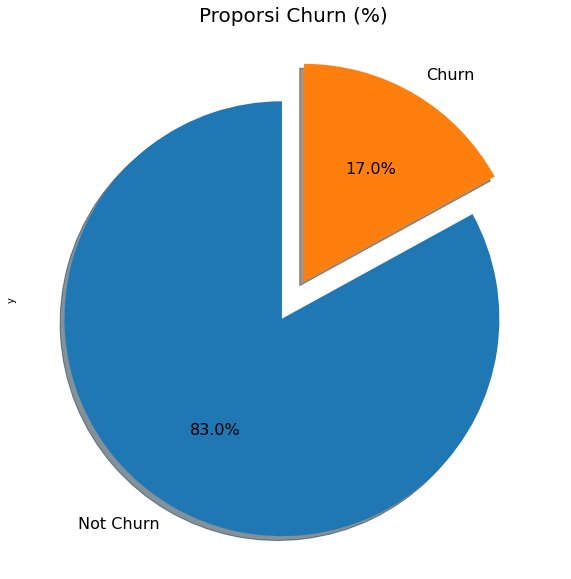

In [28]:
labels = 'Not Churn', 'Churn'
data['y'].value_counts().plot.pie(explode=[0.1,0.1],labels=labels, autopct='%1.1f%%',shadow=True
                                  ,figsize=(10,10), startangle =90, fontsize=16 );
plt.title("Proporsi Churn (%)", size = 20)

Tidak churn di dalam data ini memiliki proporsi sebesar 83% dibanding churn yang memiliki proporsi sebesar 17%

In [30]:
data['x79']=data.x79.map({'Laki-laki':0,'Perempuan':1})

In [32]:
data

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x116,x117,x118,x119,x120,x121,x122,x123,x124,y
0,0.067563,-2.172492,-1.713774,-0.146854,-0.685219,-0.933838,4.0,2.0,-4.476051,-1.472306,...,4.607926,52.0,1.0,0.773809,0.766531,6.307142,9.074515,-2.694049,0.330964,0
2,0.648421,3.881137,0.961359,0.217361,-1.471850,-0.975352,5.0,1.0,-0.850146,-4.011487,...,13.770410,53.0,1.0,-8.598553,-2.958302,-12.784030,-36.855873,0.356093,1.499790,0
3,0.005775,-2.726153,2.891378,-0.038325,2.280847,1.761478,3.0,3.0,9.116188,-4.610151,...,5.904901,50.0,1.0,8.194975,-7.798308,10.910515,15.226094,-10.440813,-0.735116,0
4,0.044396,2.803576,-1.923381,-0.116657,-1.574199,6.098627,3.0,1.0,-13.956141,13.785099,...,-14.603703,47.0,0.0,2.330789,-8.249825,-12.680490,40.192302,-5.037065,1.679262,1
5,-0.462368,2.526347,0.920240,-0.020618,-5.179910,-3.853827,4.0,3.0,8.257549,-6.077966,...,8.989221,50.0,1.0,8.922885,-5.568685,17.034558,9.341854,-5.052589,1.617410,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,-0.163563,2.438109,1.142136,0.002454,0.169952,2.216681,4.0,2.0,-5.715841,4.984970,...,17.133604,47.0,1.0,17.686885,-6.626956,0.748989,26.693600,7.034931,3.269267,0
99995,0.225476,0.519236,-0.228287,-0.216690,1.532745,-4.199383,7.0,3.0,6.063920,-3.915295,...,-2.417893,49.0,1.0,-0.961071,3.755243,-15.784960,-8.636031,-2.889891,-1.282423,0
99996,0.679236,-1.481743,-0.758356,0.042105,-0.519277,4.708936,4.0,2.0,-3.211836,-0.186456,...,13.669746,50.0,0.0,-3.019698,-7.595073,19.131624,18.984271,8.288159,2.443079,0
99997,-0.280894,-1.123589,-3.524835,0.098581,3.557413,4.165918,3.0,2.0,-1.861652,8.395887,...,-4.275254,49.0,1.0,12.351632,-1.809379,-14.952984,-30.913815,0.214523,8.503047,1


# Pre Proc & TrainTest

In [36]:
data2= pd.get_dummies(data[['x21','x89','x108','x112']])
data2.head()

,x21_Apr,x21_Aug,x21_Dec,x21_Feb,x21_Jan,x21_Jul,x21_Jun,x21_Mar,x21_May,x21_Nov,...,x112_Dec,x112_Feb,x112_Jan,x112_Jul,x112_Jun,x112_Mar,x112_May,x112_Nov,x112_Oct,x112_Sep
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [37]:
data3 = pd.concat([data2,data],axis = 1)
data3.head()

,x21_Apr,x21_Aug,x21_Dec,x21_Feb,x21_Jan,x21_Jul,x21_Jun,x21_Mar,x21_May,x21_Nov,...,x116,x117,x118,x119,x120,x121,x122,x123,x124,y
0,0,0,0,0,0,0,1,0,0,0,...,4.607926,52.0,1.0,0.773809,0.766531,6.307142,9.074515,-2.694049,0.330964,0
2,0,0,0,0,0,1,0,0,0,0,...,13.770410,53.0,1.0,-8.598553,-2.958302,-12.784030,-36.855873,0.356093,1.499790,0
3,0,0,0,0,0,0,1,0,0,0,...,5.904901,50.0,1.0,8.194975,-7.798308,10.910515,15.226094,-10.440813,-0.735116,0
4,0,0,0,0,0,1,0,0,0,0,...,-14.603703,47.0,0.0,2.330789,-8.249825,-12.680490,40.192302,-5.037065,1.679262,1
5,0,0,0,0,0,1,0,0,0,0,...,8.989221,50.0,1.0,8.922885,-5.568685,17.034558,9.341854,-5.052589,1.617410,0


In [53]:
X = data3.drop(['y','x21','x89','x108','x112'],axis=1).values
Y = data3['y'].values
Y = to_categorical(Y)

Xtrain, Xtest, ytrain, ytest = train_test_split(X,Y, test_size = 0.2, random_state=42)

In [52]:
X.info(null_counts=True, verbose =1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83976 entries, 0 to 99999
Data columns (total 177 columns):
 #    Column                  Non-Null Count  Dtype  
---   ------                  --------------  -----  
 0    x21_Apr                 83976 non-null  uint8  
 1    x21_Aug                 83976 non-null  uint8  
 2    x21_Dec                 83976 non-null  uint8  
 3    x21_Feb                 83976 non-null  uint8  
 4    x21_Jan                 83976 non-null  uint8  
 5    x21_Jul                 83976 non-null  uint8  
 6    x21_Jun                 83976 non-null  uint8  
 7    x21_Mar                 83976 non-null  uint8  
 8    x21_May                 83976 non-null  uint8  
 9    x21_Nov                 83976 non-null  uint8  
 10   x21_Oct                 83976 non-null  uint8  
 11   x21_Sep                 83976 non-null  uint8  
 12   x89_Bali                83976 non-null  uint8  
 13   x89_Bangka Belitung     83976 non-null  uint8  
 14   x89_Banten          

In [54]:
Xtrain.shape, Xtest.shape, ytrain.shape, ytest.shape

((67180, 177), (16796, 177), (67180, 2), (16796, 2))

In [55]:
n_cols = X.shape[1]
n_cols

177

# Model

In [56]:
model = Sequential()
model.add(Dense(32, activation ='relu', input_shape=(n_cols,)))
model.add(Dense(2, activation ='softmax'))

## Compile Model

In [59]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['AUC'])

In [61]:
history = model.fit(Xtrain, ytrain, validation_data = (Xtest,ytest), epochs = 150)

Epoch 1/150
2100/2100 [==============================] - 2s 1ms/step - loss: 0.5934 - auc: 0.8720 - val_loss: 0.4985 - val_auc: 0.8682
Epoch 2/150
2100/2100 [==============================] - 2s 1ms/step - loss: 0.5656 - auc: 0.8742 - val_loss: 0.4209 - val_auc: 0.8921
Epoch 3/150
2100/2100 [==============================] - 2s 1ms/step - loss: 0.5667 - auc: 0.8741 - val_loss: 0.4413 - val_auc: 0.8824
Epoch 4/150
2100/2100 [==============================] - 2s 1ms/step - loss: 0.5753 - auc: 0.8736 - val_loss: 0.4837 - val_auc: 0.8962
Epoch 5/150
2100/2100 [==============================] - 2s 1ms/step - loss: 0.5980 - auc: 0.8729 - val_loss: 0.4552 - val_auc: 0.8809
Epoch 6/150
2100/2100 [==============================] - 2s 1ms/step - loss: 0.5530 - auc: 0.8761 - val_loss: 0.5184 - val_auc: 0.8950
Epoch 7/150
2100/2100 [==============================] - 2s 1ms/step - loss: 0.5479 - auc: 0.8765 - val_loss: 0.9817 - val_auc: 0.5647
Epoch 8/150
2100/2100 [==============================] 